<a href="https://colab.research.google.com/github/nhuyen183/DS-DV-Project/blob/master/Basic_Data_Mining_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Rule Mining with Apriori Algorithm

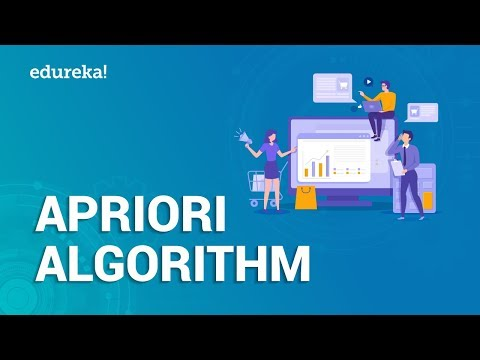

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('guVvtZ7ZClw', width=800, height=300)

In [ ]:
!pip install apyori  #This instals the Apyori package for using the Association Mining Apriori algorithm

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=e487017675a7100bb84a895cd2626dd862f7d492b462b374922d97d4cc40548c
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


Importing the Dataset
Now let's import the dataset and see what we're working with. Download the store_data.csv dataset from iCollege.

In [ ]:
from google.colab import files
files.upload()

Saving store_data.csv to store_data.csv


{'store_data.csv': b'shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil\nburgers,meatballs,eggs\nchutney\nturkey,avocado\nmineral water,milk,energy bar,whole wheat rice,green tea\nlow fat yogurt\nwhole wheat pasta,french fries\nsoup,light cream,shallot\nfrozen vegetables,spaghetti,green tea\nfrench fries\neggs,pet food\ncookies\nturkey,burgers,mineral water,eggs,cooking oil\nspaghetti,champagne,cookies\nmineral water,salmon\nmineral water\nshrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt\nturkey,eggs\nturkey,fresh tuna,tomatoes,spaghetti,mineral water,black tea,salmon,eggs,chicken,extra dark chocolate\nmeatballs,milk,honey,french fries,protein bar\nred wine,shrimp,pasta,pepper,eggs,chocolate,shampoo\nrice,sparkling water\nspaghetti,mineral water,ham,body spray,pancakes,green tea\nburgers,grated cheese,s

In [ ]:
store_data = pd.read_csv('store_data.csv')

Let's call the head() function to see how the dataset looks:

In [ ]:
store_data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If you carefully look at the data, we can see that the header is actually the first transaction. Each row corresponds to a transaction and each column corresponds to an item purchased in that specific transaction. The NaN tells us that the item represented by the column was not purchased in that specific transaction.

In this dataset there is no header row. But by default, pd.read_csv function treats first row as header. To get rid of this problem, add header=None option to pd.read_csv function, as shown below:

In [ ]:
store_data = pd.read_csv('store_data.csv', header=None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Proprocessing

The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list. Currently we have data in the form of a pandas dataframe. To convert our pandas dataframe into a list of lists, execute the following script:

In [ ]:
records = []
for i in range(0, 7501):
    records.append([str(store_data.values[i,j]) for j in range(0, 20)])

## Applying Apriori

The next step is to apply the Apriori algorithm on the dataset. To do so, we can use the apriori class that we imported from the apyori library.

The apriori class requires some parameter values to work. The first parameter is the list of list that you want to extract rules from. The second parameter is the min_support parameter. This parameter is used to select the items with support values greater than the value specified by the parameter. Next, the min_confidence parameter filters those rules that have confidence greater than the confidence threshold specified by the parameter. Similarly, the min_lift parameter specifies the minimum lift value for the short listed rules. Finally, the min_length parameter specifies the minimum number of items that you want in your rules.

Let's suppose that we want rules for only those items that are purchased at least 5 times a day, or 7 x 5 = 35 times in one week, since our dataset is for a one-week time period. The support for those items can be calculated as 35/7500 = 0.0045. The minimum confidence for the rules is 20% or 0.2. Similarly, we specify the value for lift as 3 and finally min_length is 2 since we want at least two products in our rules. These values are mostly just arbitrarily chosen, so you can play with these values and see what difference it makes in the rules you get back out.

In [ ]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In the second line here we convert the rules found by the apriori class into a list since it is easier to view the results in this form.

## Viewing the Results

Let's first find the total number of rules mined by the apriori class. Execute the following script:

In [ ]:
print(len(association_results))

48


The script above should return 48. Each item corresponds to one rule.

Let's print the first item in the association_rules list to see the first rule. Execute the following script:

In [ ]:
print(association_results[0])

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])


The first item in the list is a list itself containing three items. The first item of the list shows the grocery items in the rule.

For instance from the first item, we can see that light cream and chicken are commonly bought together. This makes sense since people who purchase light cream are careful about what they eat hence they are more likely to buy chicken i.e. white meat instead of red meat i.e. beef. Or this could mean that light cream is commonly used in recipes for chicken.

The support value for the first rule is 0.0045. This number is calculated by dividing the number of transactions containing light cream divided by total number of transactions. The confidence level for the rule is 0.2905 which shows that out of all the transactions that contain light cream, 29.05% of the transactions also contain chicken. Finally, the lift of 4.84 tells us that chicken is 4.84 times more likely to be bought by the customers who buy light cream compared to the default likelihood of the sale of chicken.

The following script displays the rule, the support, the confidence, and lift for each rule in a more clear way:

In [ ]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: chicken -> light cream
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: escalope -> mushroom cream sauce
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: tomato sauce -> ground beef
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: olive oil -> whole wheat pasta
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896
Rule: nan -> chicken
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: chocolate -> shrimp
Support: 0.005332622317024397
Confidence: 0.23255813

We have already discussed the first rule. Let's now discuss the second rule. The second rule states that mushroom cream sauce and escalope are bought frequently. The support for mushroom cream sauce is 0.0057. The confidence for this rule is 0.3006 which means that out of all the transactions containing mushroom, 30.06% of the transactions are likely to contain escalope as well. Finally, lift of 3.79 shows that the escalope is 3.79 more likely to be bought by the customers that buy mushroom cream sauce, compared to its default sale.

# kNN - k-Nearest Neighbors

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## Read in the dataset

We will use the pandas .read_csv() method to read in the dataset (knnDataset.csv from iCollege). Then we will use the .head() method to observe the first few rows of the data, to understand the information better. In our case, the feature(column) headers tell us pretty little. This is fine because we are merely trying to gain insight via classifying new data points by referencing it’s neighboring elements.

Colab only code:

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/my-lectures/big_data_analysis/data')
!pwd

/content/gdrive/My Drive/my-lectures/big_data_analysis/data


In [ ]:
# Use pandas .read_csv() method to read in classified dataset
# index_col -> argument assigns the index to a particular column
df = pd.read_csv('knnDataSet.csv', index_col=0)
# Use the .head() method to display the first few rows
df.head()

,x,y,TL,L
0,-0.244444,0.301107,1.0,1.0
1,-0.240343,0.317298,1.0,1.0
2,-0.207210,0.353345,1.0,1.0
3,-0.226363,0.303629,1.0,1.0
4,-0.244606,0.321406,1.0,1.0


## Standardize (normalize) the data scale to prep for KNN algorithm

Because the distance between pairs of points plays a critical part on the classification, it is necessary to normalize the data to minimize this. This will generate an array of values. Again, KNN depends on the distance between each feature.

In [ ]:
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class
# use the .drop() method to gather all features except Target Class
# axis -> argument refers to columns; a 0 would represent rows
scaler.fit(df.drop('TL', axis=1))

# Use scaler object to conduct a transforms
scaled_features = scaler.transform(df.drop('TL',axis=1))
# Review the array of values generated from the scaled features process
scaled_features

array([[-1.179044  , -0.25671475, -1.41421356],
       [-1.15926374, -0.19379598, -1.41421356],
       [-0.99945321, -0.05371892, -1.41421356],
       ...,
       [-0.38865227, -1.23425459,         nan],
       [-1.05220124, -1.28322167,         nan],
       [-0.99721671, -1.52140689,         nan]])

Here we have the normalized dataset, minus the target column

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,x,y,TL
0,-1.179044,-0.256715,-1.414214
1,-1.159264,-0.193796,-1.414214
2,-0.999453,-0.053719,-1.414214
3,-1.091834,-0.246916,-1.414214
4,-1.179827,-0.177833,-1.414214


## Split the normalized data into training and test sets

This step is required to prepare us for the fitting (i.e. training) the model later. The “X” variable is a collection of all the features. The “y” variable is the target label which specifies the classification of 1 or 0 based. Our goal will be to identify which category the new data point should fall into.

In [ ]:
# Import module to split the data
from sklearn.model_selection import train_test_split
# Set the X and ys
X = df_feat.fillna(0)
y = df['TL'].fillna(0)
# Use the train_test_split() method to split the data into respective sets
# test_size -> argument refers to the size of the test subset
# random_state -> argument ensures guarantee that the output of Run 
# 1 will be equal to the output of Run 2, i.e. your split will be always the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

This allows for use to train our model on the training set and evaluate the built model against the test set to identify errors.

## Create and Train the Model

Here we create a KNN Object and use the .fit() method to train the model. Upon completion of the model we should receive confirmation that the training has been completed.

In [ ]:
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
# Create KNN instance
# n_neighbors -> argument identifies the amount of neighbors used to ID classification
knn = KNeighborsClassifier(n_neighbors=1)
# Fit (i.e. traing) the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Make Predictions

Here we review where our model was accurate and where it misclassified elements.

In [ ]:
# Use the .predict() method to make predictions from the X_test subset
pred = knn.predict(X_test)
# Review the predictions
pred

array([3., 1., 5., 1., 5., 4., 3., 1., 1., 5., 1., 5., 5., 1., 3., 3., 5.,
       5., 2., 4., 5., 3., 1., 3., 4., 2., 4., 2., 4., 5., 5., 2., 4., 4.,
       4., 5., 2., 2., 2., 2., 5., 5., 5., 3., 1., 2., 5., 2., 3., 5., 3.,
       4., 2., 5., 2., 4., 3., 2., 5., 4., 2., 1., 4., 1., 4., 4., 2., 5.,
       2., 4., 1., 2., 3., 4., 1., 2., 4., 1., 1., 5., 1., 2., 2., 3., 3.,
       1., 5., 2., 3., 2., 2., 2., 1., 1., 4., 5., 3., 1., 1., 4., 4., 5.,
       1., 5., 4., 3., 2., 3., 3., 4., 1., 1., 1., 1., 5., 3., 1., 5., 3.,
       2., 1., 3., 3., 2., 2., 4., 2., 2., 5., 4., 3., 3., 1., 5., 3., 2.,
       1., 1., 4., 3., 2., 3., 3., 3., 2., 2., 2., 2., 5., 1., 1., 4., 1.,
       4., 3., 4., 1., 2., 4., 3., 5., 2., 1., 4., 5., 3., 4., 5., 2., 1.,
       2., 3., 5., 1., 4., 1., 1., 2., 5., 3., 1., 1., 3., 1., 3., 1., 3.,
       1., 2., 1., 2., 4., 4., 2., 5., 1., 4., 1., 1., 2., 3., 1., 4., 1.,
       4., 1., 1., 2., 3., 4., 5., 2., 1., 5., 4., 2., 1., 4., 3., 4., 4.,
       1., 2., 3., 2., 2.

## Evaluate the predictions

Evaluate the Model by reviewing the classification report or confusion matrix. By reviewing these tables, we are able to evaluate how accurate our model is with new values.

In [ ]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix

# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94        83
         2.0       0.87      0.85      0.86        97
         3.0       0.84      0.86      0.85        80
         4.0       0.97      0.95      0.96        96
         5.0       0.94      0.93      0.93        94

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



## Confusion Matrix

In [ ]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 80
FP - False Positive 2
FN - False Negative 2
TP - True Positive 82
Accuracy Rate: 0.36
Misclassification Rate: 0.008888888888888889


## Evaluate alternative K-values for better predictions

To simplify the process of evaluating multiple cases of k-values, we create a function to derive the error using the average where our predictions were not equal to the test values.

In [ ]:
# Generate function to add error rates of KNN with various k-values
# error_rate -> empty list to gather error rates at various k-values
# for loop -> loops through k values 1 to 39
# knn -> creates instance of KNeighborsClassifier with various k
# knn.fit -> trains the model
# pred_i -> conducts predictions from model on test subset
# error_rate.append -> adds error rate of model with various k-value, using the average where prediction not
# equal to the test values
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

## Plot Error Rate

Text(0, 0.5, 'Error Rate')

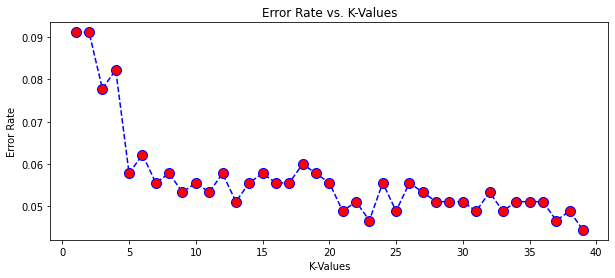

In [ ]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

Here we see that the error rate continues to decrease as we increase the k-value. A picture tells a thousand words. Or at least here, we are able to understand what value of k leads to an optimal model. The k-value of 15 seems to give a decent error rate without too much noise, as we see with k-values of 25 and larger.

## Adjust K value per error rate evaluations

This is just fine tuning our model to increase accuracy. We will need to retrain our model with the new k-value.

In [ ]:
# Retrain model using optimal k-value
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.89      0.98      0.93        83
         2.0       0.93      0.93      0.93        97
         3.0       0.94      0.93      0.93        80
         4.0       0.97      0.99      0.98        96
         5.0       0.99      0.89      0.94        94

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



In [ ]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 81
FP - False Positive 2
FN - False Negative 2
TP - True Positive 90
Accuracy Rate: 0.38
Misclassification Rate: 0.008888888888888889


# Support Vector Machines

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.

We begin with the standard imports:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Motivating Support Vector Machines

In our disussion of Bayesian classification, we learned a simple model describing the distribution of each underlying class, and used these generative models to probabilistically determine labels for new points.
That was an example of *generative classification*; here we will consider instead *discriminative classification*: rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

As an example of this, consider the simple case of a classification task, in which the two classes of points are well separated:

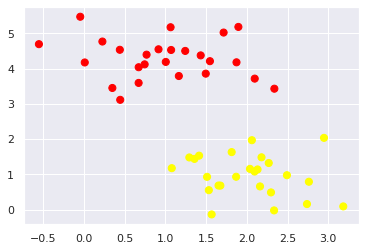

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification.
For two dimensional data like that shown here, this is a task we could do by hand.
But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

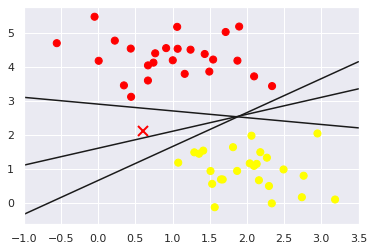

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three *very* different separators which, nevertheless, perfectly discriminate between these samples.
Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!
Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

## Support Vector Machines: Maximizing the *Margin*

Support vector machines offer one way to improve on this.
The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a *margin* of some width, up to the nearest point.
Here is an example of how this might look:

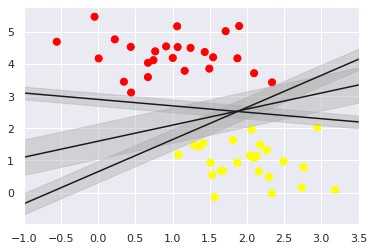

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.
Support vector machines are an example of such a *maximum margin* estimator.

### Fitting a support vector machine

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data.
For the time being, we will use a linear kernel and set the ``C`` parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

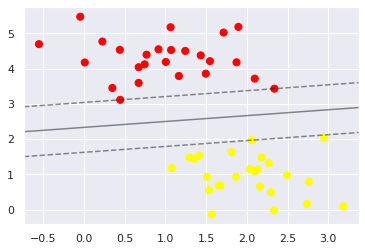

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

This is the dividing line that maximizes the margin between the two sets of points.
Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure.
These points are the pivotal elements of this fit, and are known as the *support vectors*, and give the algorithm its name.
In Scikit-Learn, the identity of these points are stored in the ``support_vectors_`` attribute of the classifier:

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit!
Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

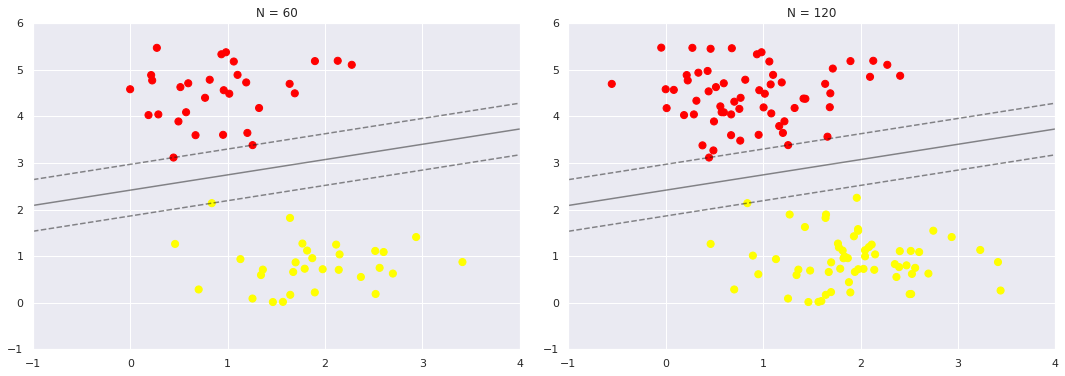

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In the left panel, we see the model and the support vectors for 60 training points.
In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel.
This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

### Beyond linear boundaries: Kernel SVM

Where SVM becomes extremely powerful is when it is combined with *kernels*.

To motivate the need for kernels, let's look at some data that is not linearly separable:

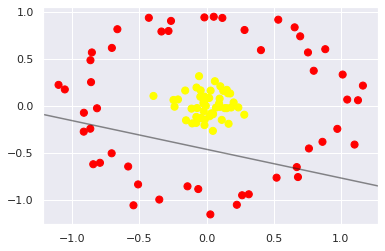

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

It is clear that no linear discrimination will *ever* be able to separate this data. So now we have to think how we might project the data into a higher dimension such that a linear separator *would* be sufficient.

For example, one simple projection we could use would be to compute a *radial basis function* centered on the middle clump:

In [ ]:
r = np.exp(-(X ** 2).sum(1))

We can visualize this extra data dimension using a three-dimensional:

Text(0.5, 0, 'r')

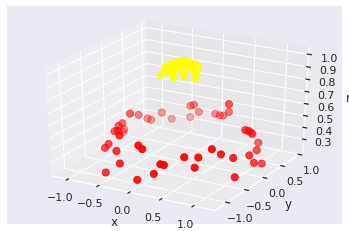

In [ ]:
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane at, say, *r*=0.7.

Here we had to choose and carefully tune our projection: if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results.
In general, the need to make such a choice is a problem: we would like to somehow automatically find the best basis functions to use.

One strategy to this end is to compute a basis function centered at *every* point in the dataset, and let the SVM algorithm sift through the results.
This type of basis function transformation is known as a *kernel transformation*, as it is based on a similarity relationship (or kernel) between each pair of points.

A potential problem with this strategy—projecting $N$ points into $N$ dimensions—is that it might become very computationally intensive as $N$ grows large.
However, because of a neat little procedure known as the [*kernel trick*](https://en.wikipedia.org/wiki/Kernel_trick), a fit on kernel-transformed data can be done implicitly—that is, without ever building the full $N$-dimensional representation of the kernel projection!
This kernel trick is built into the SVM, and is one of the reasons the method is so powerful.

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the ``kernel`` model hyperparameter:

In [ ]:
clf = SVC(kernel='rbf', C=1E6, gamma='auto')
clf.fit(X, y)

SVC(C=1000000.0, gamma='auto')

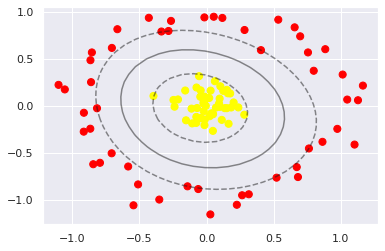

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary.
This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

## Practical Example: Face Recognition

As an example of support vector machines in action, let's take a look at the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures.
A fetcher for the dataset is built into Scikit-Learn:

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's plot a few of these faces to see what we're working with:

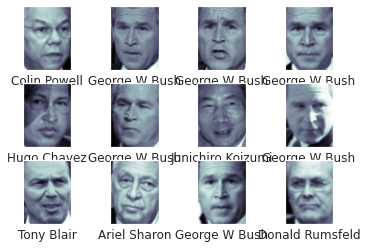

In [ ]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels.
We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis (see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)) to extract 150 fundamental components to feed into our support vector machine classifier.
We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

For the sake of testing our classifier output, we will split the data into a training and testing set:

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Finally, we can use a grid search cross-validation to explore combinations of parameters.
Here we will adjust ``C`` (which controls the margin hardness) and ``gamma`` (which controls the size of the radial basis function kernel), and determine the best model:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv=5)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 53.4 s, sys: 18.6 s, total: 1min 12s
Wall time: 40.8 s
{'svc__C': 10, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Let's take a look at a few of the test images along with their predicted values:

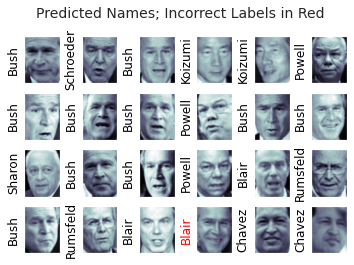

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s
face in the bottom row was mislabeled as Blair).
We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



We might also display the confusion matrix between these classes:

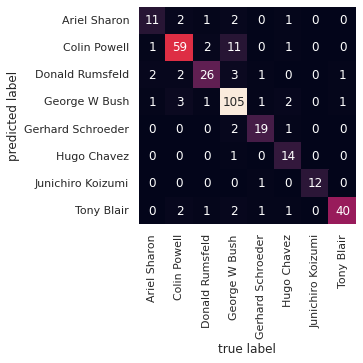

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

This helps us get a sense of which labels are likely to be confused by the estimator.

For a real-world facial recognition task, in which the photos do not come pre-cropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixellation.
For this kind of application, one good option is to make use of [OpenCV](http://opencv.org), which, among other things, includes pre-trained implementations of state-of-the-art feature extraction tools for images in general and faces in particular.

## Support Vector Machine Summary

We have seen here a brief intuitive introduction to the principals behind support vector machines.
These methods are a powerful classification method for a number of reasons:

- Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
- Once the model is trained, the prediction phase is very fast.
- Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
- Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

However, SVMs have several disadvantages as well:

- The scaling with the number of samples $N$ is $\mathcal{O}[N^3]$ at worst, or $\mathcal{O}[N^2]$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
- The results are strongly dependent on a suitable choice for the softening parameter $C$. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
- The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the ``probability`` parameter of ``SVC``), but this extra estimation is costly.

With those traits in mind, I generally only turn to SVMs once other simpler, faster, and less tuning-intensive methods have been shown to be insufficient for my needs.
Nevertheless, if you have the CPU cycles to commit to training and cross-validating an SVM on your data, the method can lead to excellent results.

# Sources:

https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6

This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas

---

### Practice

Using SVM to carry out the classification on this below data:

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/mrudula95/SVM-BankData/master/bank-full.csv')
data.head()